## Quotations indicate the career success of public figures
**ChillDataGroup: Zihan Wu, Yinhao Wang, Yichen Wang, Yihang Chen**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load QuoteBank Dataset
We refer to the pipeline provided in Google Colab to load the quotations from 2015 to 2020.

Due to the large size of data, when loading them, we just load the data said by the senate election since 2015 candidates. We also load the data that mention any of the senates candidates. The dataset for senate elections is obtained from MIT Election Data and Science Lab [1].

We also provide the codes for generating these senate candidate quotations below, but those are run ahead in google colab (takes around 30min for the each year's data). We did not re-run them here.

[1] MIT Election Data and Science Lab, 2017, "U.S. Senate 1976–2020", https://doi.org/10.7910/DVN/PEJ5QU, Harvard Dataverse, V5, UNF:6:cIUB3CEIKhMi9tiY4BffLg== [fileUNF]

In [2]:
# Pipeline obtained from the course google colab
from tld import get_tld

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld


In [3]:
# Load the Senate Election Result data 
import pandas as pd
senate_file = 'SenateData/1976-2020-senate.csv'
senate_election = pd.read_csv(senate_file, encoding= 'unicode_escape')
senate_election.sample(10) # demonstrate the format of election data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
2532,2010,ILLINOIS,IL,17,33,21,US SENATE,statewide,gen,True,NaN,NaN,True,total,15,3704473,False,20210114,OTHER
1388,1996,MASSACHUSETTS,MA,25,14,3,US SENATE,statewide,gen,False,OTHER,NaN,False,total,1511,2555942,False,20210114,OTHER
3152,2016,LOUISIANA,LA,22,72,45,US SENATE,statewide,gen,False,JOSHUA PELLERIN,DEMOCRAT,False,total,7395,1997218,False,20210114,DEMOCRAT
535,1984,ALABAMA,AL,1,63,41,US SENATE,statewide,gen,False,ALBERT LEE SMITH,REPUBLICAN,False,total,498508,1371234,False,20210114,REPUBLICAN
1384,1996,MASSACHUSETTS,MA,25,14,3,US SENATE,statewide,gen,False,JOHN F. KERRY,DEMOCRAT,False,total,1334135,2555942,False,20210114,DEMOCRAT
340,1980,MISSOURI,MO,29,43,34,US SENATE,statewide,gen,False,GENE MCNARY,REPUBLICAN,False,total,985399,2066965,False,20210114,REPUBLICAN
3350,2018,NEW JERSEY,NJ,34,22,12,US SENATE,statewide,gen,False,MADELYN R. HOFFMAN,GREEN,False,total,25150,3169310,False,20210114,OTHER
2129,2006,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,DON J. GRUNDMANN,INDEPENDENT,False,total,75350,8541476,False,20210114,OTHER
1231,1994,NEBRASKA,NE,31,46,35,US SENATE,statewide,gen,False,NaN,NaN,True,total,1240,579205,False,20210114,OTHER
1431,1996,NORTH CAROLINA,NC,37,56,47,US SENATE,statewide,gen,False,JESSE HELMS,REPUBLICAN,False,total,1345833,2556456,False,20210114,REPUBLICAN


Here, we only choose the candidate running for elections since 2016, because the supported Quotebank data goes back to 2015

In [4]:
# Load the names of candidates since 2016
# The NaN names are dropped, and repeated names are dropped
senate_candidates = senate_election[senate_election['year'] >= 2016]['candidate'].dropna().unique()

**We donot run the cell below because takes too long**

In [ ]:
# Load each year's data, filtering out the quotations said by senates
# For now, we ignore name variations of the same persion, just focusing the names
# provided in the senate candidates dataset
import bz2
import json

path_to_file = 'RawData/quotes-2015.json.bz2' 
path_to_out = 'SenateData/quotes-2015-senates.json.bz2'

with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for instance in s_file:
            instance = json.loads(instance) # loading a sample
            if instance['speaker'].upper() in senate_candidates: # only load the quotes said by wanted 
                urls = instance['urls'] # extracting list of links
                domains = []
                for url in urls:
                    tld = get_domain(url)
                    domains.append(tld)
                instance['domains'] = domains # updating the sample with domain name
                d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

In [ ]:
# Load each year's data, filtering out the quotations that mention senates
# Too slow, not run here.
# Considering that people's full name is less likely used in quotations, only match full name may
# cause the lacking of data. The name variations problem may need more consideration in that case.

path_to_file = '/content/drive/MyDrive/Quotebank/quotes-{}.json.bz2'
path_to_out = '/content/drive/MyDrive/ADAQuoteBank/quotes-{}-senates-mention.json.bz2'

senate_candidates = list(map(lambda x:x.title(), senate_candidates))

for year in range(2018,2021):
    print('... Start processing quotations in year {}'.format(year))
    with bz2.open(path_to_file.format(year), 'rb') as s_file:
        with bz2.open(path_to_out.format(year), 'wb') as d_file:
            for instance in s_file:
                instance = json.loads(instance)
                if any(x in instance['quotation'] for x in senate_candidates):
                    d_file.write((json.dumps(instance)+'\n').encode('utf-8'))

## 1. Process Senate Candidate Data
**1.1** In this section, we load the information of senate candidates (since 2016) and their election information.

In [5]:
# First, we get the election information of the candidates since 2016 (again, we drop NaN and repeated names)
candidate_info = senate_election[senate_election['year'] >= 2016].dropna(subset=['candidate']).drop_duplicates(subset=['candidate'], ignore_index=True)


In [185]:
# Load the stored quotations said by senate candidates since 2015 (by year)
senate_quote_20 = pd.read_json('SenateData/quotes-2020-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_19 = pd.read_json('SenateData/quotes-2019-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_18 = pd.read_json('SenateData/quotes-2018-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_17 = pd.read_json('SenateData/quotes-2017-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_16 = pd.read_json('SenateData/quotes-2016-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_15 = pd.read_json('SenateData/quotes-2015-senates-said.json.bz2', lines=True, compression='bz2')


In [186]:
# Concatenate data across all years and display the format of quotation data
annual_frames = [senate_quote_15, senate_quote_16, senate_quote_17, senate_quote_18, senate_quote_19, senate_quote_20]
candidate_quotes = pd.concat(annual_frames)
candidate_quotes.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
127576,2019-02-07-015687,Chairman Nadler and Democrats overplayed their...,Doug Collins,"[Q18352424, Q3162841, Q5300375, Q919954]",2019-02-07 19:03:58,4,"[[Doug Collins, 0.8882], [None, 0.1], [Matthew...",[http://blogs.rollcall.com/news/congress/whita...,E,"[com, com, com, com]"
80989,2019-01-02-081062,We have to work to work together on border sec...,Debbie Stabenow,[Q241092],2019-01-02 17:15:37,1,"[[Debbie Stabenow, 0.9247], [None, 0.0667], [P...",[http://wwmt.com/news/state/sen-stabenow-says-...,E,[com]
1524,2015-01-20-091136,We're going for a law.... We've had longstandi...,Robert Menendez,[Q888132],2015-01-20 01:44:36,1,"[[Robert Menendez, 0.548], [None, 0.3818], [Pr...",[http://thehill.com/policy/defense/229998-iran...,E,[com]
60162,2018-05-03-054103,I want to see long-term recovery in every part...,Paula Jean Swearengin,[Q30070264],2018-05-03 07:00:00,1,"[[Paula Jean Swearengin, 0.7976], [None, 0.2024]]",[http://www.register-herald.com/news/who-is-pa...,E,[com]
63849,2015-11-16-105656,until there has been a thorough review of DHS ...,Rob Portman,[Q926069],2015-11-16 21:54:53,1,"[[Rob Portman, 0.4586], [Mark Kirk, 0.3351], [...",[http://thehill.com/blogs/floor-action/senate/...,E,[com]
12780,2016-04-28-080328,I've never had a substantive conversation with...,Ted Cruz,[Q2036942],2016-04-28 21:15:27,1,"[[Ted Cruz, 0.9638], [None, 0.0362]]",[http://pjmedia.com/trending/2016/04/28/cruz-w...,E,[com]
93444,2016-02-17-029113,had not ruled out holding hearings on Mr. Obam...,Chuck Grassley,[Q529294],2016-02-17 10:51:23,1,"[[Chuck Grassley, 0.8401], [None, 0.1229], [Pr...",[http://www.breitbart.com/big-government/2016/...,E,[com]
18334,2015-08-13-074703,Now those policy positions are dramatically ou...,Ted Cruz,[Q2036942],2015-08-13 00:00:57,4,"[[Ted Cruz, 0.6258], [None, 0.335], [George P....",[http://www.texastribune.org/2015/08/12/bush-c...,E,"[org, org, org, com]"
81795,2015-07-17-016706,Do they think I'm afraid of the word? I'm not ...,Bernie Sanders,[Q359442],2015-07-17 10:10:40,11,"[[Bernie Sanders, 0.6576], [None, 0.3169], [Pr...",[http://www.politico.com/story/2015/07/14-thin...,E,"[com, com, com, com, com, com, com, com, ca, c..."
186560,2018-05-25-107750,This bill's passage marks one of our greatest ...,Mike Crapo,[Q734319],2018-05-25 15:13:10,1,"[[Mike Crapo, 0.578], [President Trump, 0.263]...",[http://themreport.com/daily-dose/05-25-2018/p...,E,[com]


**1.2** We group the total number of quotations by speaker and dates. By doing so, we can visualize the change of quoted number as time goes on. Below, we take Bernie Sanders as an example.

In [187]:
# Clean the names by taking only upper case
# Group the candidate total number of quotes by day
candidate_quotes['speaker'] = candidate_quotes['speaker'].str.upper()
candidate_quotes['date_only'] = candidate_quotes['date'].dt.date
candidate_quotes_byday = candidate_quotes.groupby(['speaker', 'date_only'])['numOccurrences'].sum()
candidate_quotes_byday

speaker          date_only 
AARON JAMES      2015-01-22     2
                 2015-02-10     7
                 2015-03-20     2
                 2015-04-03     1
                 2015-05-21     2
                               ..
ZAK RINGELSTEIN  2018-10-30    12
                 2018-11-01     5
                 2018-11-05     1
                 2018-11-07     1
                 2019-03-21     1
Name: numOccurrences, Length: 105532, dtype: int64

Text(0.5, 1.0, 'Bernie Sanders')

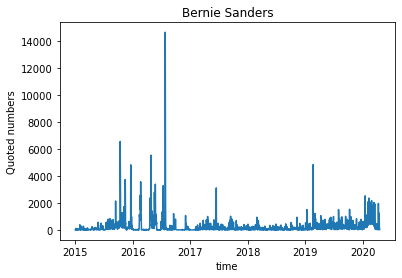

In [188]:
# For example, we can visualize the quotation changes of Bernie Sanders
candidate_quotes_byday['BERNIE SANDERS'].plot()
plt.xlabel('time')
plt.ylabel('Quoted numbers')
plt.title('Bernie Sanders')

**1.3** We compute the total number of quotations until their election. The election dataset only contains the year of election. However, since the U.S. senate elections always take place in the first week of November, we just compute the total number of quotations until November.1st of the election year.

In [189]:
# Add the election day corresponding to each candidate speaker
candidate_info_byname = candidate_info.set_index(['candidate']) # Allow access info by name as index
candidate_quotes['election_day'] = candidate_quotes['speaker'].map(candidate_info_byname['year']).astype(str)+ '-11-01'
candidate_quotes['election_day'] = pd.to_datetime(candidate_quotes['election_day'])

In [190]:
# Add election result (i.e. vote rate) for each candidate speaker
candidate_info_byname['vote_rate'] = candidate_info_byname['candidatevotes']/candidate_info_byname['totalvotes']

In [ ]:
# We group the number of quotations by election day
quotes_byelection = candidate_quotes[candidate_quotes['date_only'] < candidate_quotes['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['speaker'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)

In [191]:
# We group the number of quotations by election day
quotes_byelection = candidate_quotes[candidate_quotes['date_only'] < candidate_quotes['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['speaker'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)

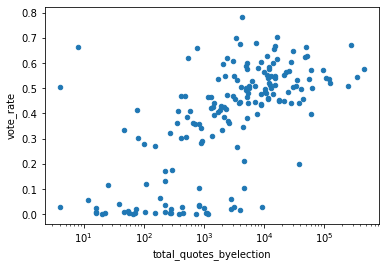

In [192]:
# We add the vote rate and plot the scatter plot of vote rate against total quotes by election
tot_quotes_byelection['vote_rate'] = tot_quotes_byelection.index.map(candidate_info_byname['vote_rate'])
quotes_vote = tot_quotes_byelection.plot.scatter(x = 'total_quotes_byelection', y = 'vote_rate', logx=True)

**Observation:** Based on the plot above, we can see that there is a positive correlation between quotations and vote_rate. The more a candidate was quoted before the election, the higher vote rate he or she got.

**1.4** We can also apply the analysis on quotations that mention senates.

In [6]:
# Load the stored quotations said by senate candidates since 2015 (by year)
senate_quote_20 = pd.read_json('SenateData/quotes-2020-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_19 = pd.read_json('SenateData/quotes-2019-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_18 = pd.read_json('SenateData/quotes-2018-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_17 = pd.read_json('SenateData/quotes-2017-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_16 = pd.read_json('SenateData/quotes-2016-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_15 = pd.read_json('SenateData/quotes-2015-senates-mention.json.bz2', lines=True, compression='bz2')

In [9]:
# Concatenate data across all years and display the format of quotation data
annual_frames = [senate_quote_15, senate_quote_16, senate_quote_17, senate_quote_18, senate_quote_19, senate_quote_20]
candidate_quotes = pd.concat(annual_frames)
candidate_quotes.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
7886,2020-02-29-003854,Bernie Sanders has never hesitated to challeng...,None,[],2020-02-29 00:00:00,1,"[[None, 0.6958], [B. Taylor, 0.3042]]",[https://www.opednews.com/articles/Illinois-Se...,E
33709,2015-09-30-145169,You've got Podemos in Spain and Syriza in Gree...,None,[],2015-09-30 11:01:19,1,"[[None, 0.9021], [Jeremy Corbyn, 0.0664], [Ton...",[http://naharnet.com/stories/en/190952-radical...,E
34446,2015-10-13-102987,These [ principles ] require your company to b...,Andrew Penn,"[Q19867600, Q45189201, Q4758235]",2015-10-13 04:47:16,2,"[[Andrew Penn, 0.7829], [None, 0.1139], [Rod S...",[http://www.computerworld.com.au/article/58660...,E
10429,2018-09-15-050018,The context is clear to all except the adviser...,None,[],2018-09-15 11:47:14,3,"[[None, 0.7832], [Abdul Razak Dawood, 0.2168]]",[http://aninews.in/news/world/asia/pak-ministe...,E
29874,2015-12-30-039328,It is a big deal and we wanted to have a prese...,Dave Kleis,[Q5229117],2015-12-30 12:01:22,1,"[[Dave Kleis, 0.5655], [None, 0.4345]]",[http://sctimes.com/story/news/local/2015/12/3...,E
24824,2017-04-18-043417,It is the first time that you have strong acti...,None,[],2017-04-18 15:30:00,1,"[[None, 0.905], [Vijay Mallya, 0.095]]",[http://www.hindustantimes.com/india-news/vija...,E
24690,2018-05-30-075746,Other shows have set up woodchopping near food...,None,[],2018-05-30 15:34:08,1,"[[None, 0.9206], [Robert Schwarten, 0.0794]]",[https://www.themorningbulletin.com.au/news/ro...,E
12273,2017-07-14-077499,"Otherwise, we're going to be looking for [ the...",Todd Gordon,[Q7812389],2017-07-14 11:12:00,1,"[[Todd Gordon, 0.9099], [None, 0.0901]]",[https://ca.finance.yahoo.com/news/apos-why-mi...,E
33986,2018-03-06-115264,The only reason I am disciplined is because my...,Aamir Khan,[Q9557],2018-03-06 10:07:08,11,"[[Aamir Khan, 0.8553], [None, 0.1447]]",[http://daijiworld.com/news/newsDisplay.aspx?n...,E
25268,2016-08-03-051761,"In a gesture meant to unite the party, Sen. Be...",Patrick Healy,[Q14949457],2016-08-03 04:43:21,1,"[[Patrick Healy, 0.6419], [None, 0.3122], [Joh...",[http://www.centredaily.com/opinion/article934...,E


In [37]:
# find the mentioned senator
senate_candidates = list(map(lambda x:x.title(), senate_candidates))
candidate_quotes['mention']=candidate_quotes['quotation'].map(lambda x:np.array(senate_candidates)[np.array(list(k in x for k in senate_candidates))][0])
candidate_quotes.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,mention,date_only
0,2015-05-17-016225,I really like Bernie Sanders and his policies ...,None,[],2015-05-17 07:09:22,1,"[[None, 0.81], [Bernie Sanders, 0.19]]",[http://dailykos.com/story/2015/05/15/1384917/...,E,Bernie Sanders,2015-05-17
1,2015-03-13-010997,Clearly Europe has a competitive edge in renew...,Anders Jansson,"[Q18199405, Q4753826, Q5828548]",2015-03-13 22:00:36,1,"[[Anders Jansson, 0.8602], [None, 0.1398]]",[http://www.hellenicshippingnews.com/nordic-ma...,E,Other,2015-03-13
2,2015-08-25-018582,Elizabeth Warren does have a thumb on the puls...,Bakari Sellers,[Q4849014],2015-08-25 10:02:35,4,"[[Bakari Sellers, 0.8813], [None, 0.1075], [El...",[http://www.kspr.com/news/politics/does-elizab...,E,Bernie Sanders,2015-08-25
3,2015-05-12-011764,"For media workers, our stand is very clear. We...",None,[],2015-05-12 16:00:00,1,"[[None, 0.9821], [Yazid Sufaat, 0.0179]]",[http://www.thestar.com.my/News/Nation/2015/05...,E,Other,2015-05-12
4,2015-09-30-031494,"How McConnell outfoxed Ted Cruz,",Mitch McConnell,[Q355522],2015-09-30 07:57:00,2,"[[Mitch McConnell, 0.7734], [None, 0.202], [Pr...",[http://feeds.washingtonpost.com/c/34656/f/636...,E,Ted Cruz,2015-09-30
5,2015-12-28-022873,"I met Tom Jones,",Emre Turkmen,[Q20090653],2015-12-28 12:20:40,1,"[[Emre Turkmen, 0.8153], [None, 0.1433], [Katy...",[http://www.bbc.co.uk/newsbeat/articles/35101319],E,Tom Jones,2015-12-28
6,2015-10-28-077973,"Mark Zuckerberg's personal Senator, Sen. Marco...",Donald Trump,"[Q22686, Q27947481]",2015-10-28 21:01:48,1,"[[Donald Trump, 0.3948], [None, 0.3058], [Jeff...",[http://breitbart.com/immigration/2015/10/28/t...,E,Marco Rubio,2015-10-28
7,2015-10-23-076901,Other holidays are for families; Halloween is ...,Jim Fielding,[Q16201553],2015-10-23 04:22:38,1,"[[Jim Fielding, 0.7661], [None, 0.2339]]",[http://www.reviewjournal.com/life/home-and-ga...,E,Other,2015-10-23
8,2015-07-16-079718,"Other teams improve, we need to improve and ge...",None,[],2015-07-16 09:30:00,8,"[[None, 0.4601], [Vincent Kompany, 0.3357], [R...",[http://www.mcfc.co.uk/News/Tour-2015/2015/Cit...,E,Other,2015-07-16
9,2015-06-14-032844,"Otherwise, from what I've seen, trees are bein...",Kenny Clark,"[Q3393375, Q6391006]",2015-06-14 05:00:00,1,"[[Kenny Clark, 0.4428], [None, 0.4277], [Bill ...",[http://www.arkansasonline.com/news/2015/jun/1...,E,Other,2015-06-14


In [ ]:
candidate_quotes['date_only'] = candidate_quotes['date'].dt.date

# filt out Other and Others
candidate_drop = candidate_quotes[candidate_quotes.mention!='Other']
candidate_drop = candidate_drop[candidate_drop.mention!='Others']
candidate_quotes_byday = candidate_drop.groupby(['mention', 'date_only'])['numOccurrences'].sum()
candidate_quotes_byday

mention           date_only 
A. Wayne Johnson  2017-06-22    1
                  2019-10-24    1
Aaron Day         2017-07-20    1
Aaron James       2015-10-10    1
                  2016-09-11    3
                               ..
Wendy Long        2017-05-09    4
                  2018-03-27    1
                  2018-05-31    2
                  2018-06-01    1
Zak Ringelstein   2018-06-22    1
Name: numOccurrences, Length: 26228, dtype: int64

Text(0.5, 1.0, 'Bernie Sanders')

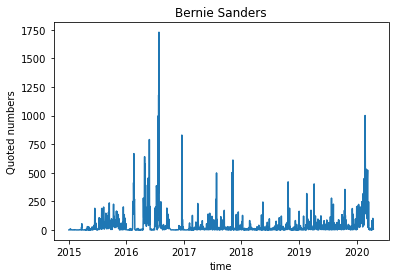

In [40]:
# Use Bernie Sanders as example
candidate_quotes_byday['Bernie Sanders'].plot()
plt.xlabel('time')
plt.ylabel('Quoted numbers')
plt.title('Bernie Sanders')

In [47]:
# Add the election day corresponding to each candidate speaker
candidate_info_byname = candidate_info.set_index(['candidate']) # Allow access info by name as index
candidate_drop['mention']=candidate_drop.mention.map(lambda x:x.upper())
candidate_drop['election_day'] = candidate_drop['mention'].map(candidate_info_byname['year']).astype(str)+ '-11-01'
candidate_drop['election_day'] = pd.to_datetime(candidate_drop['election_day'])
candidate_drop

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,mention,date_only,election_day
0,2015-05-17-016225,I really like Bernie Sanders and his policies ...,None,[],2015-05-17 07:09:22,1,"[[None, 0.81], [Bernie Sanders, 0.19]]",[http://dailykos.com/story/2015/05/15/1384917/...,E,BERNIE SANDERS,2015-05-17,2018-11-01
2,2015-08-25-018582,Elizabeth Warren does have a thumb on the puls...,Bakari Sellers,[Q4849014],2015-08-25 10:02:35,4,"[[Bakari Sellers, 0.8813], [None, 0.1075], [El...",[http://www.kspr.com/news/politics/does-elizab...,E,BERNIE SANDERS,2015-08-25,2018-11-01
4,2015-09-30-031494,"How McConnell outfoxed Ted Cruz,",Mitch McConnell,[Q355522],2015-09-30 07:57:00,2,"[[Mitch McConnell, 0.7734], [None, 0.202], [Pr...",[http://feeds.washingtonpost.com/c/34656/f/636...,E,TED CRUZ,2015-09-30,2018-11-01
5,2015-12-28-022873,"I met Tom Jones,",Emre Turkmen,[Q20090653],2015-12-28 12:20:40,1,"[[Emre Turkmen, 0.8153], [None, 0.1433], [Katy...",[http://www.bbc.co.uk/newsbeat/articles/35101319],E,TOM JONES,2015-12-28,2016-11-01
6,2015-10-28-077973,"Mark Zuckerberg's personal Senator, Sen. Marco...",Donald Trump,"[Q22686, Q27947481]",2015-10-28 21:01:48,1,"[[Donald Trump, 0.3948], [None, 0.3058], [Jeff...",[http://breitbart.com/immigration/2015/10/28/t...,E,MARCO RUBIO,2015-10-28,2016-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
12426,2020-02-04-115095,Will he have as much money as Bernie Sanders? ...,John Morgan,"[Q11979020, Q139214, Q16563478, Q18385418, Q24...",2020-02-04 00:00:00,12,"[[John Morgan, 0.7601], [None, 0.2232], [Joe B...",[http://wnyt.com/politics/bidens-poor-showing-...,E,BERNIE SANDERS,2020-02-04,2018-11-01
12427,2020-04-01-014369,Flavor don't know the difference between Berni...,Chuck D,[Q733373],2020-04-01 03:25:11,1,"[[Chuck D, 0.7015], [None, 0.1735], [Flavor Fl...",[http://www.billboard.com/articles/columns/hip...,E,BERNIE SANDERS,2020-04-01,2018-11-01
12428,2020-01-21-022794,He was sitting next to Cory Booker on the plan...,None,[],2020-01-21 11:00:00,2,"[[None, 0.742], [American historian, 0.258]]",[http://newyorker.com/culture/culture-desk/the...,E,CORY BOOKER,2020-01-21,2020-11-01
12430,2020-04-03-037736,Kelly Loeffler can't buy her way out of this. ...,Doug Collins,"[Q18352424, Q3162841, Q5300375, Q919954]",2020-04-03 12:30:13,1,"[[Doug Collins, 0.8913], [None, 0.1087]]",[http://www.myajc.com/blog/politics/the-jolt-t...,E,KELLY LOEFFLER,2020-04-03,2020-11-01


In [48]:
# Add election result (i.e. vote rate) for each candidate speaker
candidate_info_byname['vote_rate'] = candidate_info_byname['candidatevotes']/candidate_info_byname['totalvotes']

In [50]:
# We group the number of quotations by election day
quotes_byelection = candidate_drop[candidate_drop['date_only'] < candidate_drop['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['mention'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)

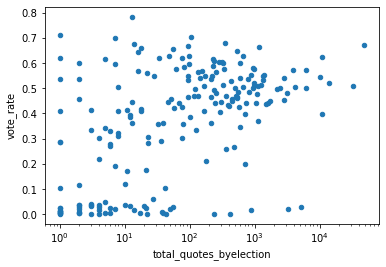

In [51]:
# We add the vote rate and plot the scatter plot of vote rate against total quotes by election
tot_quotes_byelection['vote_rate'] = tot_quotes_byelection.index.map(candidate_info_byname['vote_rate'])
quotes_vote = tot_quotes_byelection.plot.scatter(x = 'total_quotes_byelection', y = 'vote_rate', logx=True)

## 2. Weigh the quotations by reading statistics
We are aware of the different reading statistics of different publishers or news agencies. We try to weigh the quotations by popularities of the publishers.

**A Bug noticed when parsing url**

**2.1** First, we sample 10k quotes and look at the source publisher of those quotations. This would give us a feel of how much news covered by QuoteBank and what types of publishers are related

In [193]:
# Sample 10k quotes and see where published
sample = candidate_quotes.sample(10000)
total_domains = []
for i in sample.index:
    urls = sample.at[i,'urls']
    for url in urls: # Some URL here is actually a list, not sure why it. can happen; Some are bad
        if isinstance(url, list):
            target = url[0] # when it is a list, the multiply urls point to the same website
        else:
            target = url
        total_domains.append(get_tld(target, as_object=True).domain)

In [194]:
# Count the frequency of publisher/news agency
from collections import Counter
domain_count = Counter(total_domains).most_common()
print("top 30 news agency/publisher: ", domain_count[0:30])
print('number of news agency covered:', len(domain_count))

top 30 news agency/publisher:  [('krmg', 1363), ('msn', 842), ('news965', 789), ('wokv', 613), ('businessinsider', 538), ('einnews', 494), ('thehill', 492), ('washingtonexaminer', 480), ('breitbart', 458), ('cnn', 441), ('yahoo', 390), ('washingtontimes', 378), ('cbsnews', 367), ('newsmax', 344), ('foxnews', 330), ('washingtonpost', 305), ('politico', 296), ('wsbradio', 280), ('huffingtonpost', 262), ('sfgate', 225), ('nbcnews', 207), ('rollcall', 192), ('nytimes', 185), ('newsweek', 174), ('ktvz', 172), ('startribune', 171), ('kvia', 169), ('kdhnews', 169), ('reuters', 155), ('seattletimes', 150)]
number of news agency covered: 3367


Among 10k samples, there are 3367 different website domains, indicating a sufficiently wide coverage of . So the quotations can be an indicator of public exposure.